## Student Performance Indicator Project

## Problem Statement
 This projects seeks to find out how students performance is affected by other factors such as their Parents level of Education, race, Test Preparation course e.t.c

## Data Collection
The data was sourced from Kaggle and contains 8 rows and 1000 columns

## Data and Packages Import 
The pandas, numpy, matplotlib,seaborn and warnings libraries were imported

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") # This helps to dimiss all warnings

In [2]:
df = pd.read_csv("./StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
## Confirming the number of rows and columns of the data 
df.shape

(1000, 8)

## Performing Neccessary Data Checks

In [4]:
## Checking for missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
## Checking for duplicates
df.duplicated().sum()

0

In [6]:
## Checking the various data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
## Checking the unique values available in the different features
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Exploring the Data

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Checking the various categories available in the features



In [9]:
print("Gender: ", end="")
print(df["gender"].unique())

Gender: ['female' 'male']


In [10]:
print("Race: ", end="")
print(df["race/ethnicity"].unique())

Race: ['group B' 'group C' 'group A' 'group D' 'group E']


In [11]:
print("parental level of education: ", end="")
print(df["parental level of education"].unique())

parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [12]:
print("lunch: " , end="")
print(df["lunch"].unique())

lunch: ['standard' 'free/reduced']


In [13]:
print("test preparation course")
print(df["test preparation course"].unique())

test preparation course
['none' 'completed']


##### Defining numerical & categorical columns

In [14]:
numerical_columns = [
    x for x in df.columns if df[x].dtype != "O"
] ## This code helps to pull out the columns which are not of string dtype

categorical_columns = [
    x for x in df.columns if df[x].dtype == "O"
] ## This code helps to pull out the columns which are of string dtype


print("There are {} numerical columns: {}".format(len(numerical_columns), numerical_columns))
print("There are {} categorical columns: {}".format(len(categorical_columns), categorical_columns))

There are 3 numerical columns: ['math score', 'reading score', 'writing score']
There are 5 categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### Adding columns "Total Score" and "Average Score" to the data

In [15]:
df["total score"] = df['math score'] + df['reading score'] + df['writing score']
df["average score"] = (df['total score']/3).round(1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3
2,female,group B,master's degree,standard,none,90,95,93,278,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3
4,male,group C,some college,standard,none,76,78,75,229,76.3


##### checking students performance across different courses

In [16]:
full_score_in_reading = df[df["reading score"] == 100]["gender"].count()
full_score_in_writing = df[df["writing score"] == 100]["gender"].count()
full_score_in_maths = df[df["math score"] == 100]["gender"].count()

print(f"{full_score_in_maths} had perfect scores in maths") 
print(f"{full_score_in_reading} had perfect scores in reading") 
print(f"{full_score_in_writing} had perfect scores in writing") 

7 had perfect scores in maths
17 had perfect scores in reading
14 had perfect scores in writing


##### The breakdown of the performance of the students by gender are as follows


In [17]:
full_score_in_reading = df[df["reading score"] == 100]["gender"].value_counts()
print(f'{full_score_in_reading["female"]} females had perfect scores in reading')
print(f'{full_score_in_reading["male"]} males had perfect scores in reading')

full_score_in_writing = df[df["writing score"] == 100]["gender"].value_counts()
print(f'{full_score_in_writing["female"]} females had perfect scores in writing')
print(f'{full_score_in_writing["male"]} males had perfect scores in writing')

full_score_in_maths = df[df["math score"] == 100]["gender"].value_counts()
print(f'{full_score_in_maths["female"]} females had perfect scores in maths')
print(f'{full_score_in_maths["male"]} males had perfect scores in maths')


14 females had perfect scores in reading
3 males had perfect scores in reading
13 females had perfect scores in writing
1 males had perfect scores in writing
3 females had perfect scores in maths
4 males had perfect scores in maths


$$\odot$$From the above analysis, it shows that females are the high performers

In [18]:
reading_less_20 = df[df['reading score'] <= 20]['gender'].count()
writing_less_20 = df[df['writing score'] <= 20]['gender'].count()
math_less_20 = df[df['math score'] <= 20]['gender'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


$$\odot$$
From the above analysis, it also shows that more students performed poorly in mathematics
Students performed better in the reading section

## Exploring Data with Visualizations

#### Visualizing the average score distribution to make some valuable conclusions
##### Histogram and Kernel Distribution Function (KDE)

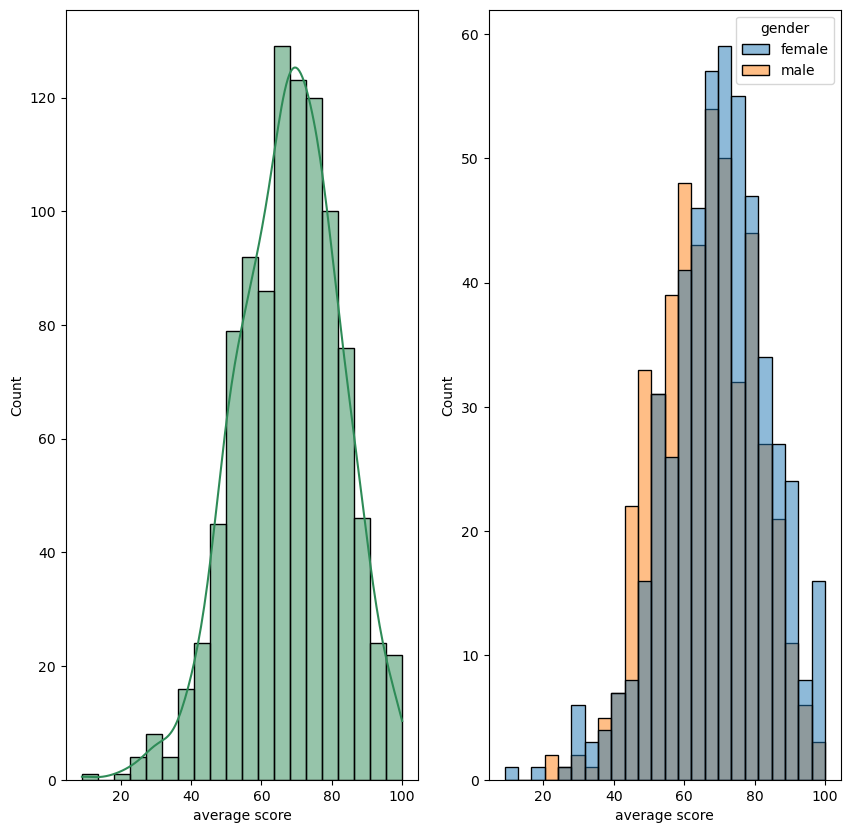

In [19]:
import seaborn as sns
fig, axs = plt.subplots(1,2, figsize = (10,10))
plt.subplot(121)
sns.histplot(data=df, x = "average score",bins = 20, kde=True, color= "seagreen")
plt.subplot(122)
sns.histplot(data = df, x = "average score", hue = "gender")
plt.show()

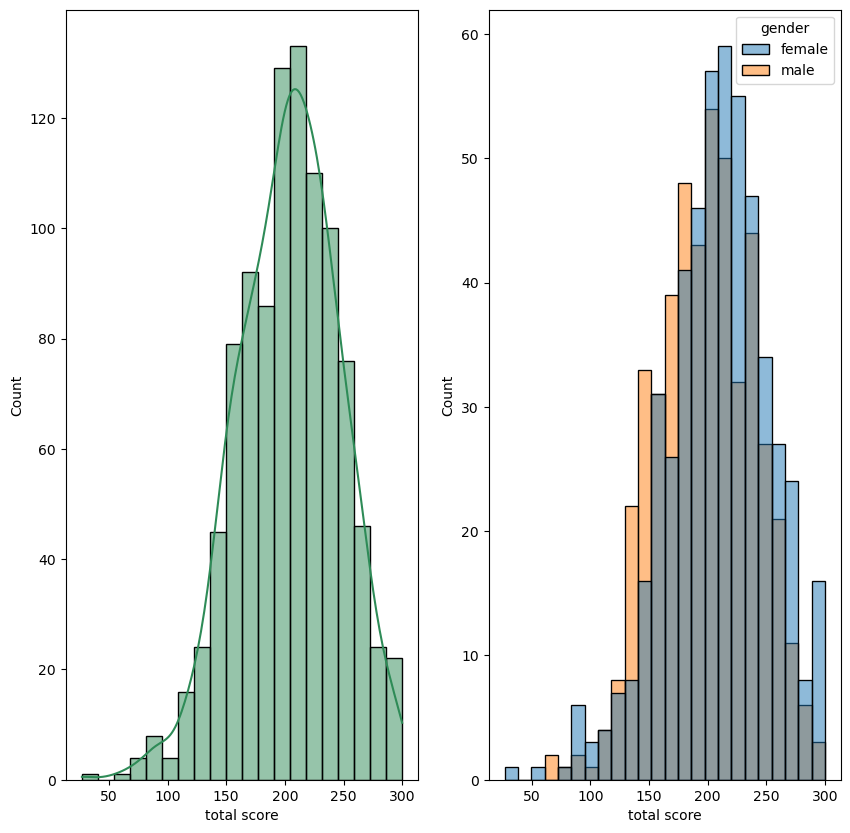

In [20]:
fig, axs = plt.subplots(1,2, figsize = (10,10))
plt.subplot(121)
sns.histplot(data=df, x = "total score",bins = 20, kde=True, color= "seagreen")
plt.subplot(122)
sns.histplot(data = df, x = "total score", hue = "gender")
plt.show()

$$\odot$$
from the above, it shows that female students a performing better than male students

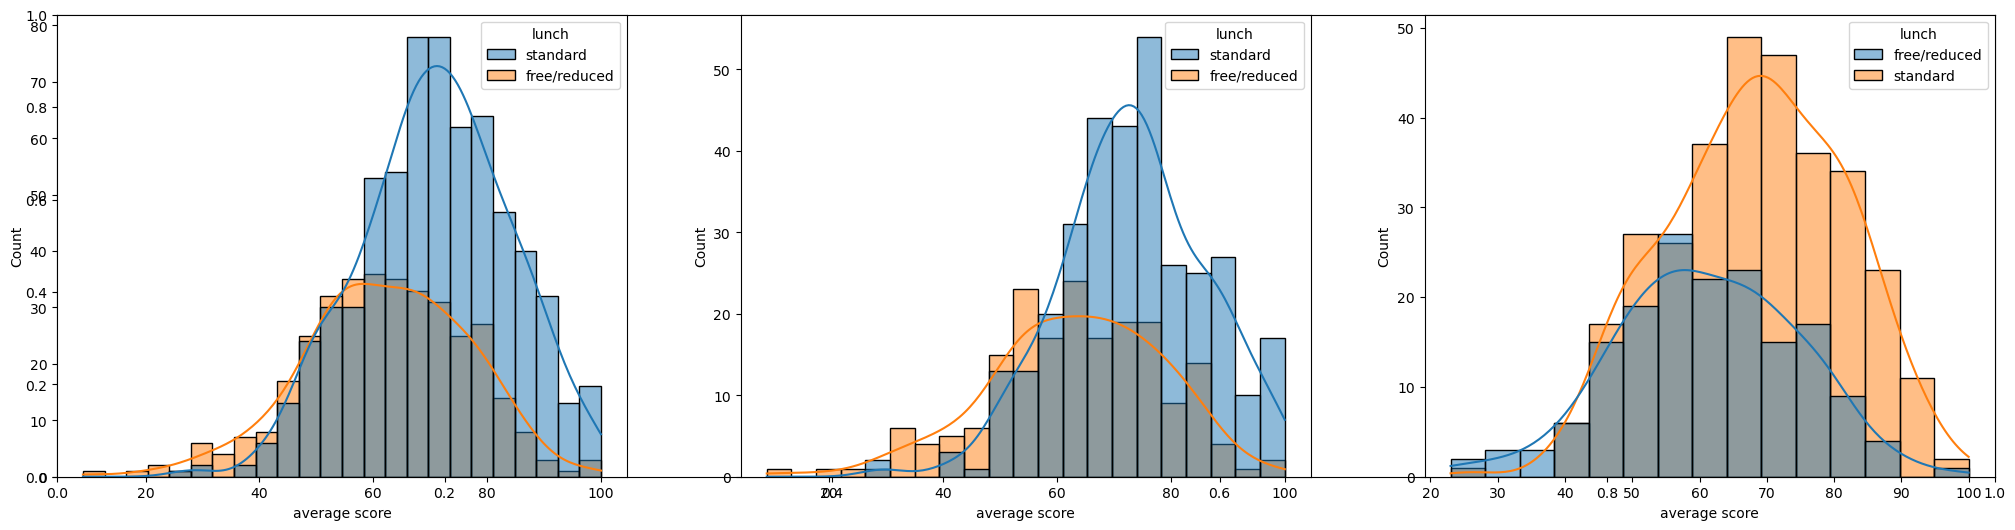

In [21]:

plt.subplots(1,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

$$\odot$$
from the above visual, it clearly shows that a standard lunch helps students perform better irrespective of their gender

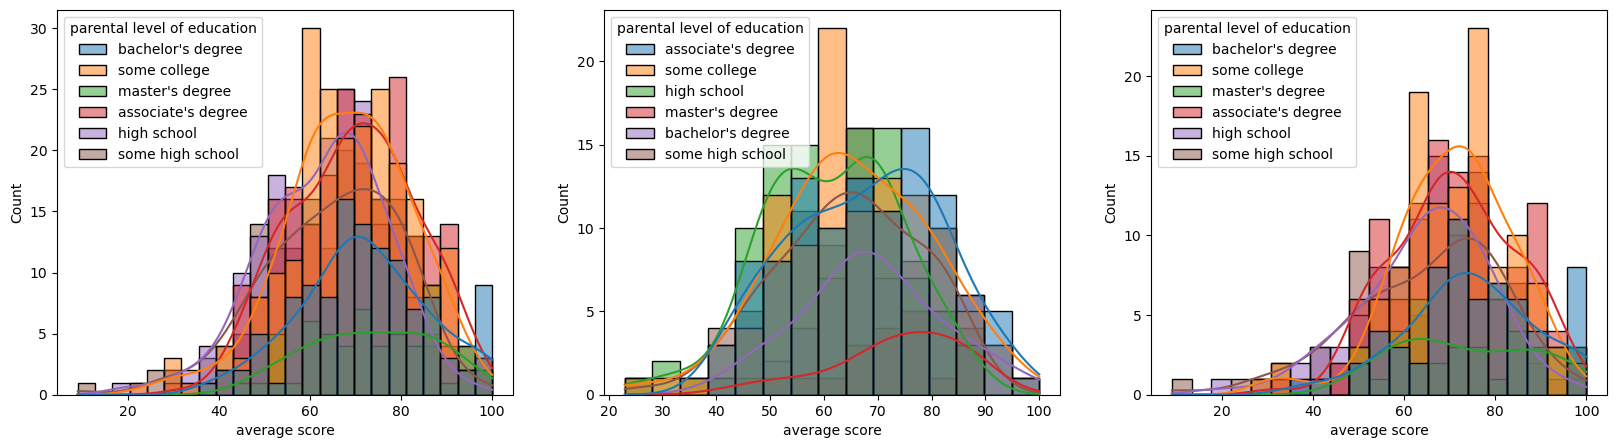

In [23]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

$$\odot$$
The first chart shows that generally the parent's level of Education does not neccessarily affect the child's performance.

The second chart shows that male student's whose parents have an associate or master's degree tend to perform better.

The final plot show's that parent's Education has no effect oh female's students performance

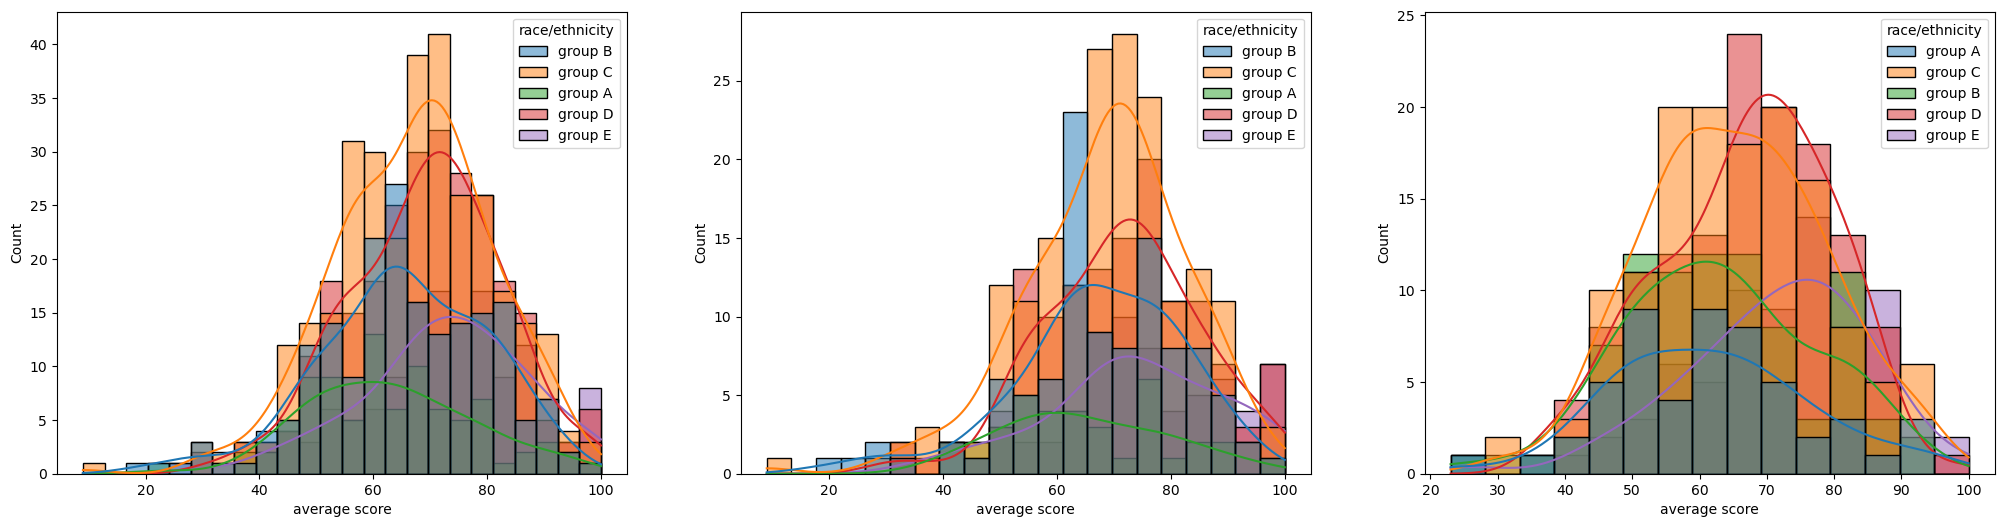

In [26]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

$$\odot$$
Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### Maximumum score of students in all three subjects

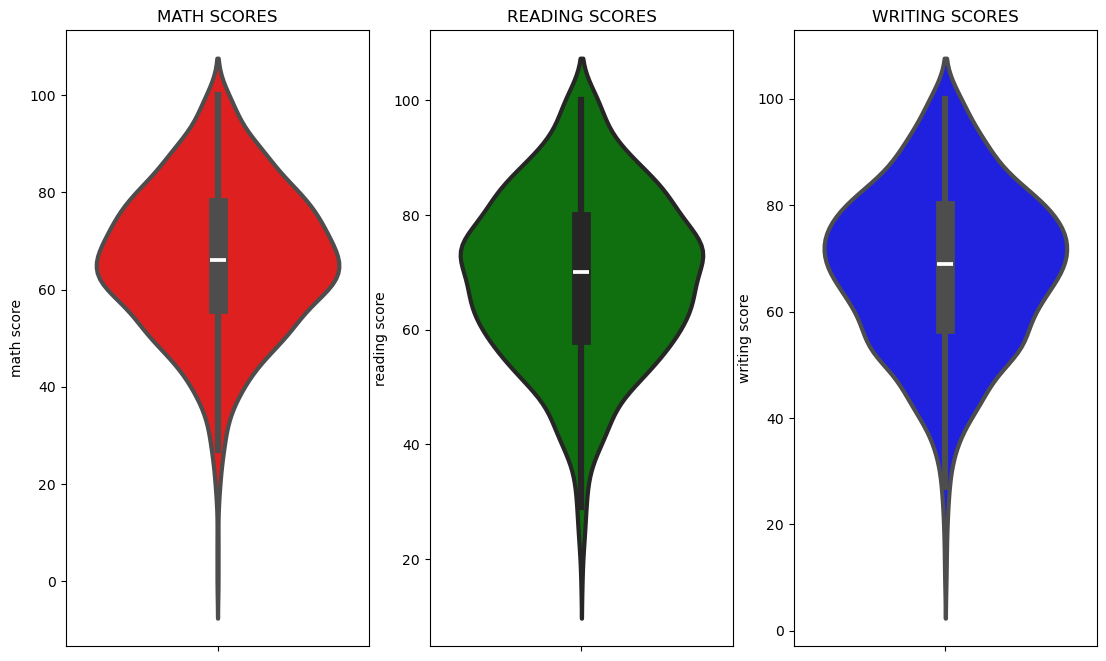

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

$$\odot$$
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

 #### Multivariate analysis using pieplot

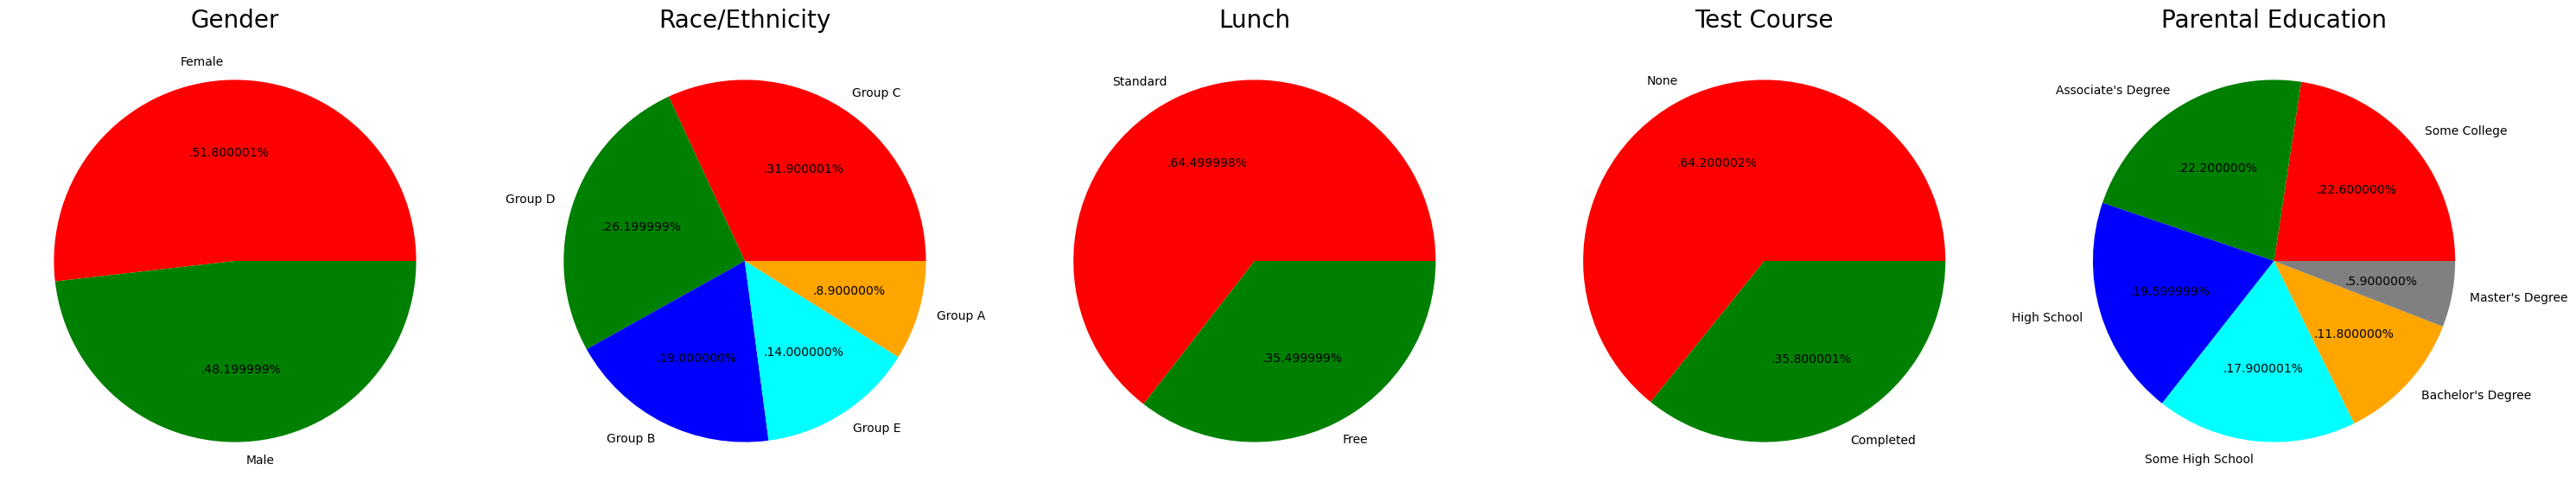

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

$$\odot$$
Number of Male and Female students is almost equal.


Students number is greatest in Group C

Students with Standard Lunch is greater.

Students that enrolled in a test is greater.


Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

$$\odot$$
Number of Male and Female students is almost equal.

Students number is greatest in Group C

Students with Standard Lunch is greater.
eStudents that enrolled in a test is greater.

ter
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Deg.ree"

## Visualization By Features|Columns

### Gender column

### Univariate Analysis ( What is the gender distribution?)

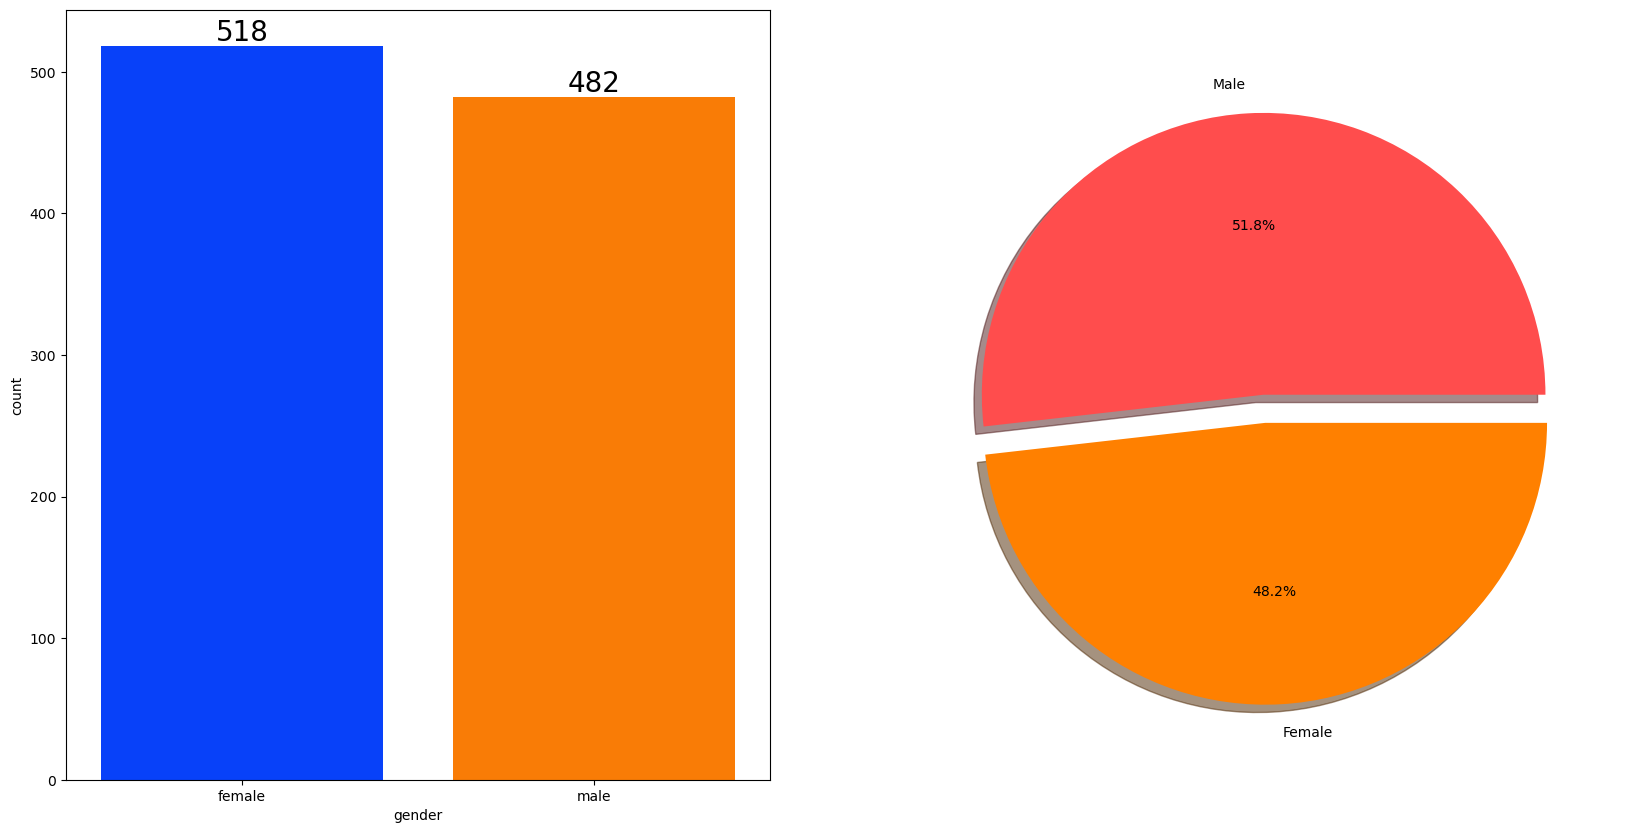

In [31]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### The gender has almost a balanced data with 52% (518) females and 48% (482) males 

### Bivariate Analysis (Does the gender has any impact on the student's performance?)

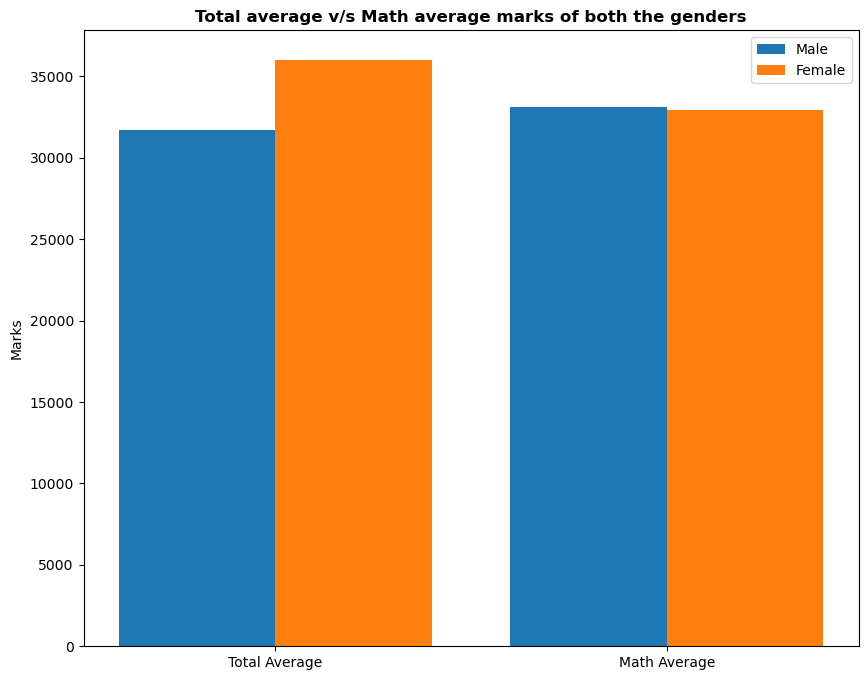

In [38]:

gender_group = df.groupby("gender").sum()

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

$$\odot$$
On an average females have a better overall score than men.

whereas males have scored higher in Maths.

### Univariate Analysis (What is the Group Wise distribution?))

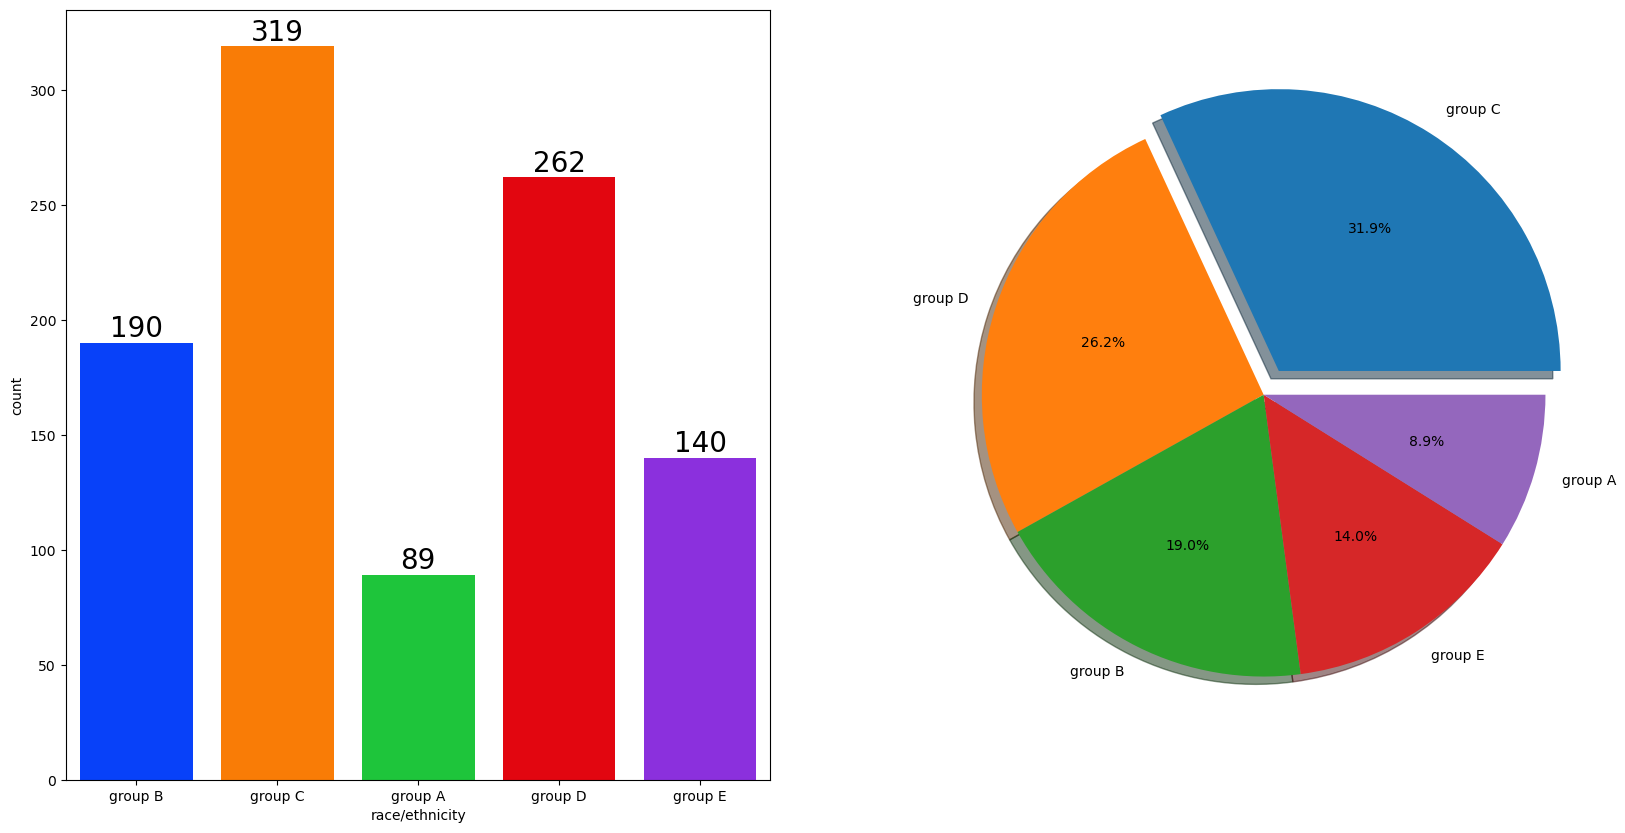

In [39]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

$$\odot$$
Most of the student belong to group C /group D.

Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Does Student's Race/Ehnicity has any impact on student's performance ? )

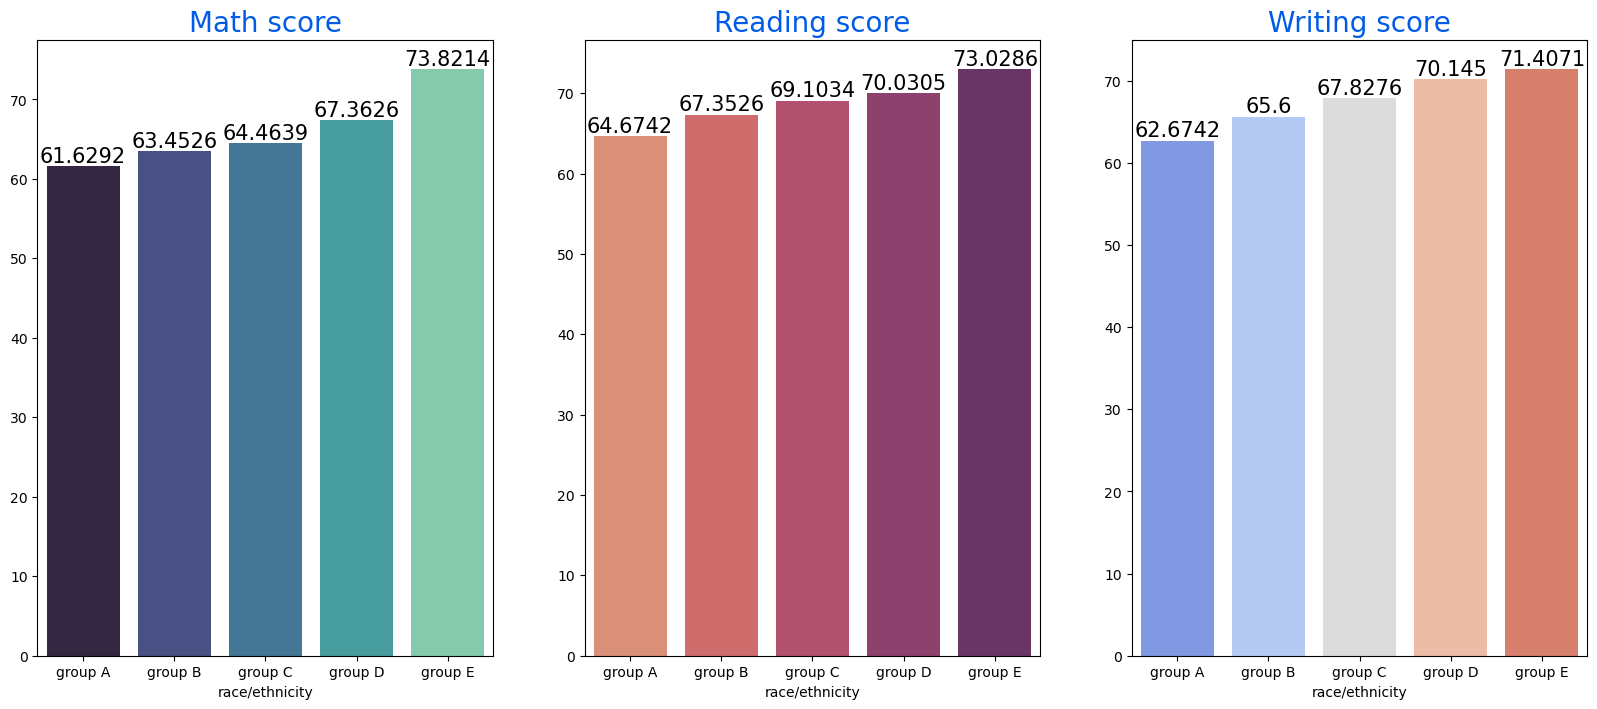

In [40]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

$$\odot$$
Group E students have scored the highest marks.

Group A students have scored the lowest mark.

Students from lower economic class score lower averagests

### Parental Level of Education Column 

What is the Educational background of student's parents?

Does the parental Educational have any impact on student's performance?

### UNIVARIATE ANALYSIS ( What is educational background of student's parents? )

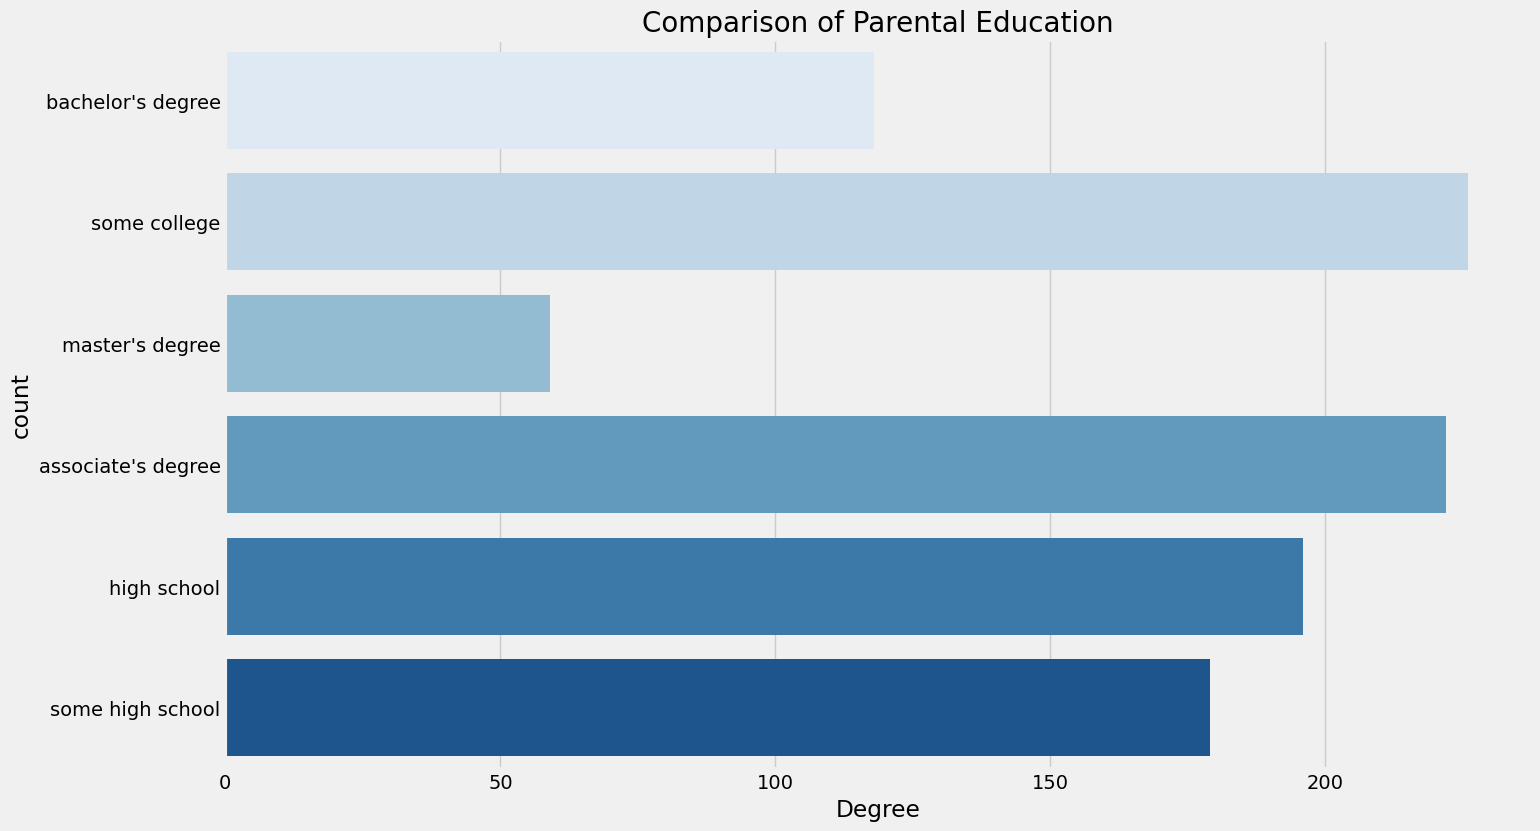

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

$$\odot$$
Parents with some college background are more


### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

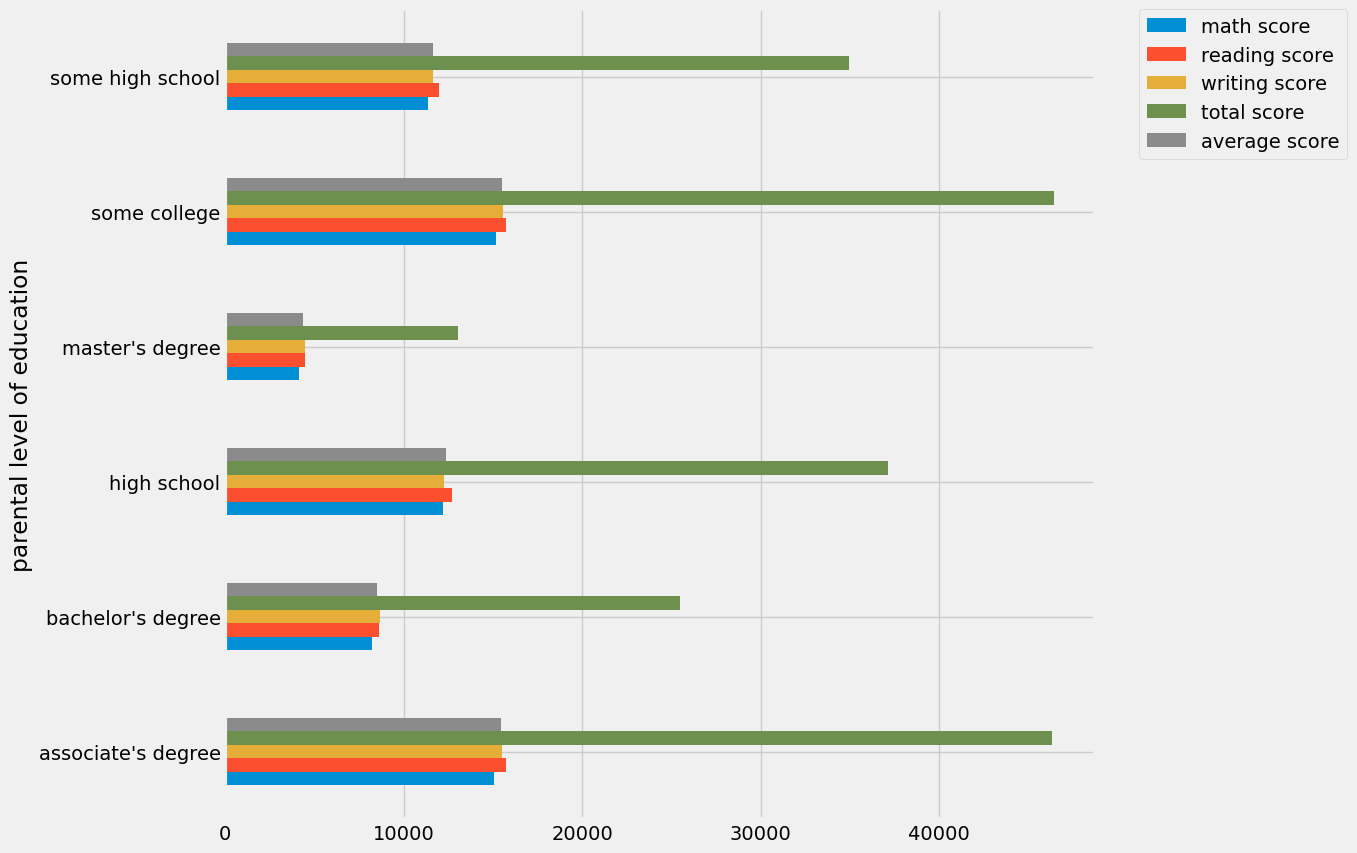

In [44]:
df.groupby('parental level of education').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

$$\odot$$ 
The score of student whose parents possess master and bachelor level education are higher than others.

### Lunch Column 
Which type of lunch is common among students?

What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

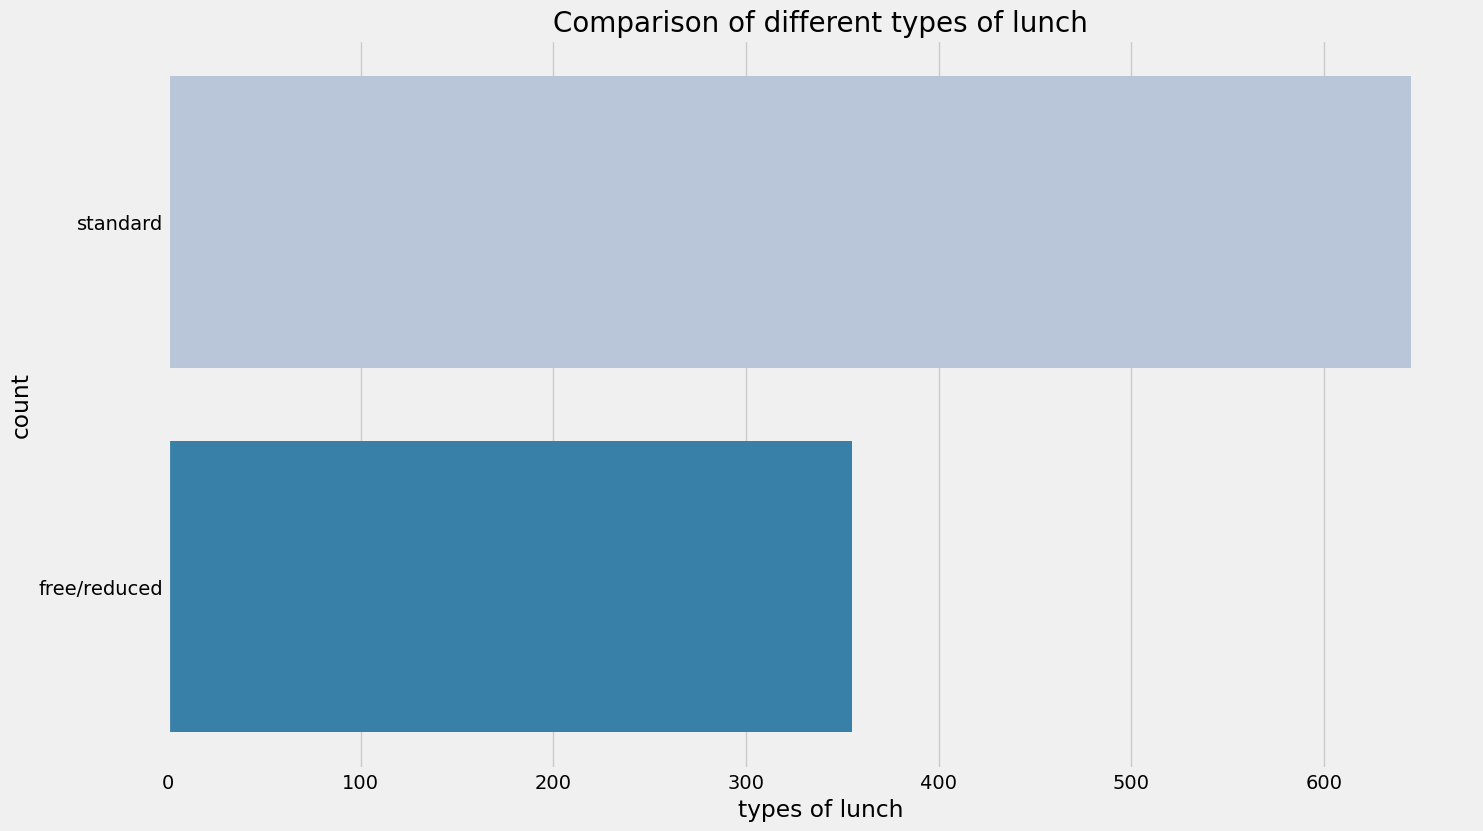

In [49]:

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

$$\odot$$
Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

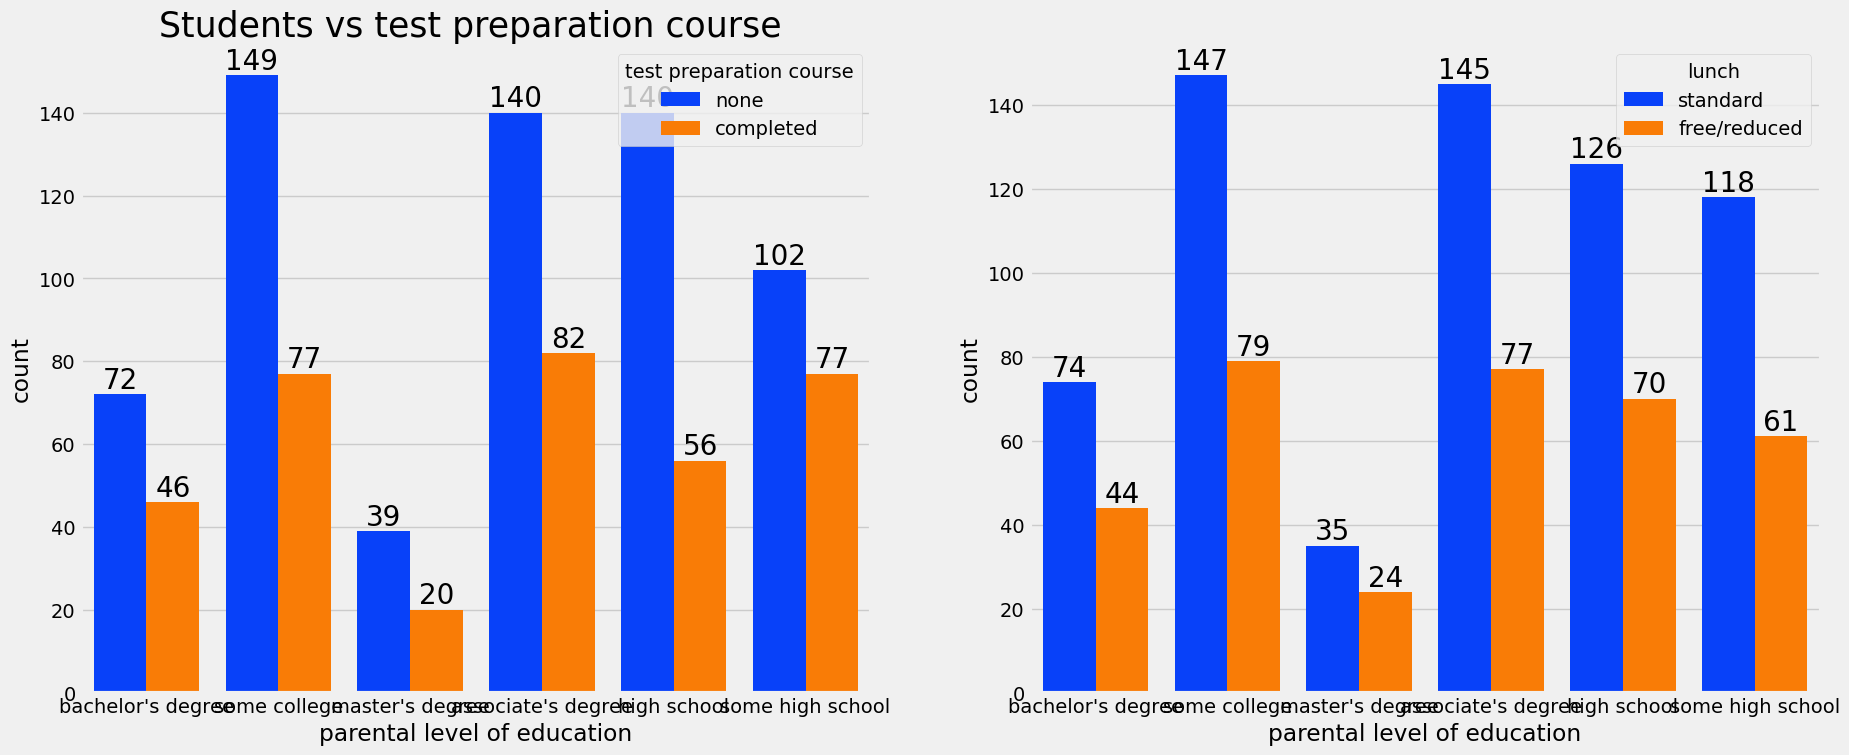

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

$$\odot$$ 
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## TEST PREPARATION COURSE COLUMN
Does Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing score'>

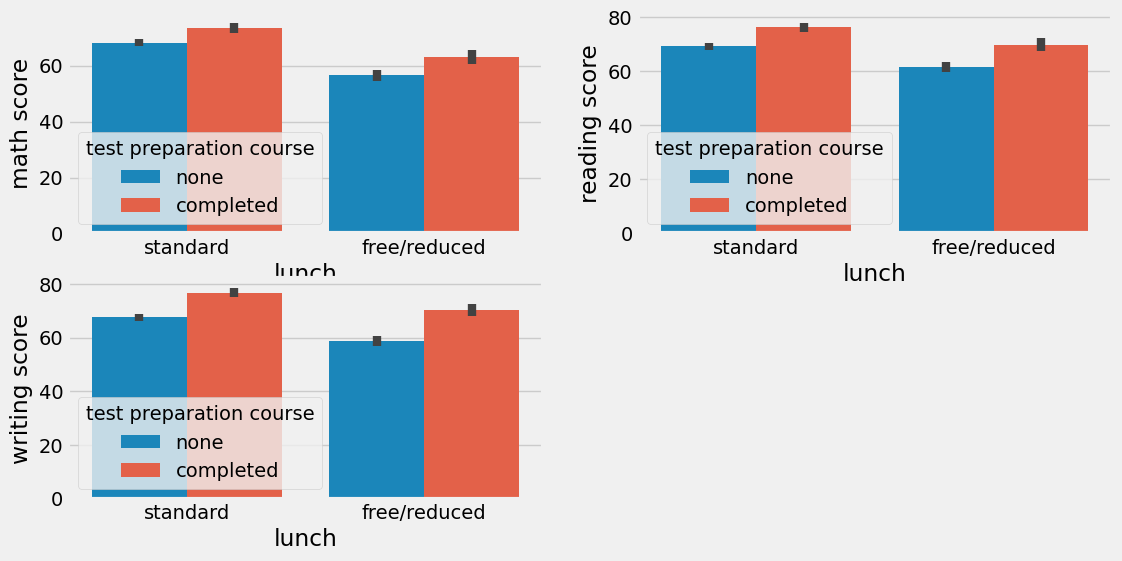

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

$$\odot$$ 
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## CHECKING  FOR OUTLIERS

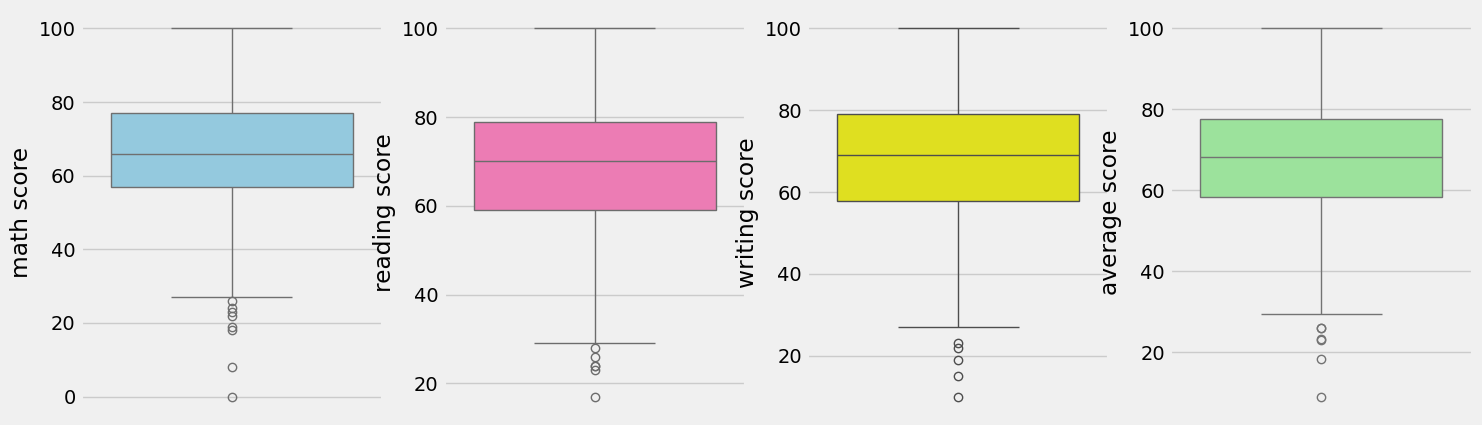

In [54]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()